In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as image

## 3.1 지도학습

지도학습은 분류(Classification)와 회귀(Regression)가 있다. 분류는 이상형 데이터로 그루핑하며 회귀는 연속형 데이터로 연속된 값을 예측한다.

### 3.1.1 K-최근접 이웃

주어진 데이터를 분류하기 위해 사용한다. 직관적이기때문에 사용하기 쉽다. 초보자용이라고 한다. 훈련데이터를 충분히 확보 할 수 있는 환경에서 좋다.

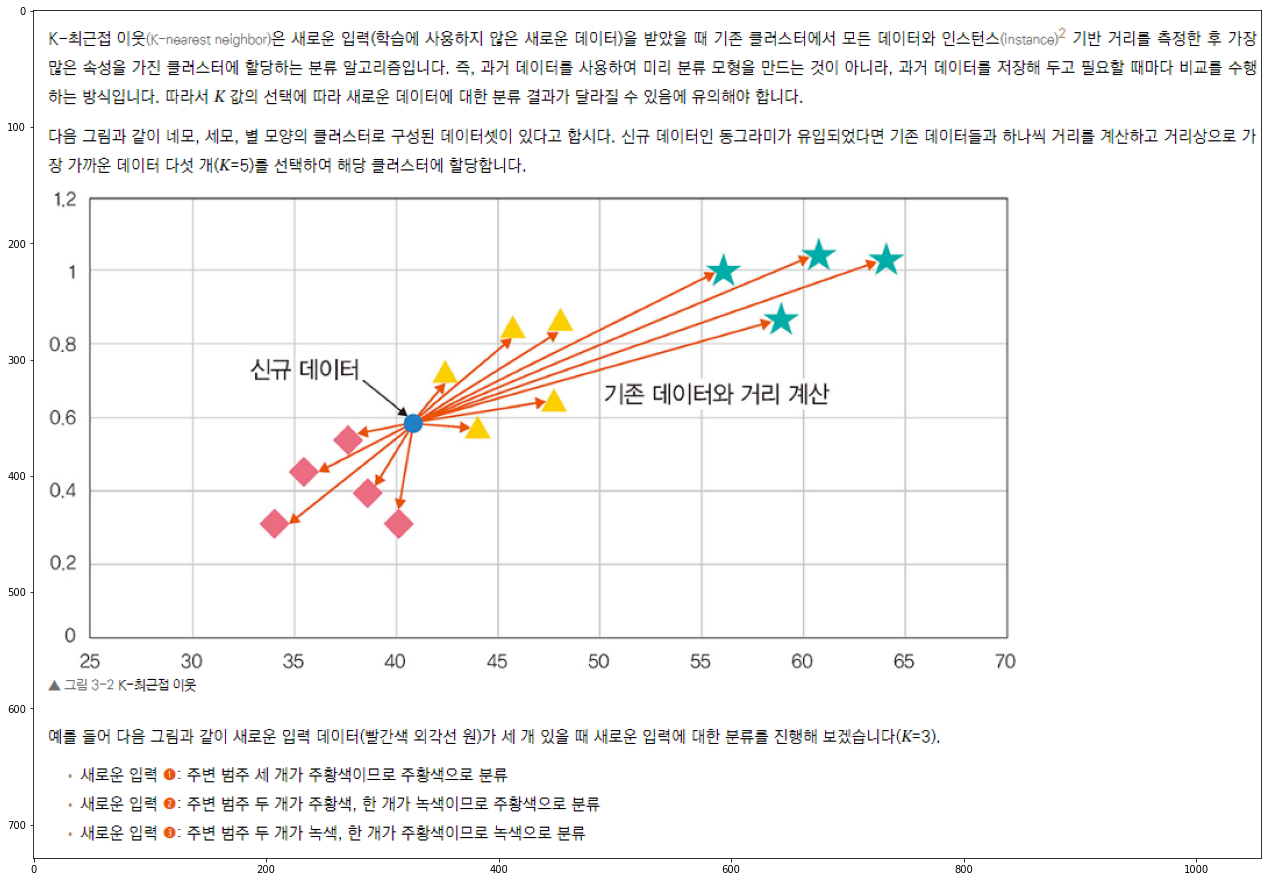

In [3]:
img1 = image.imread('./image/k.png')
plt.rcParams["figure.figsize"] = (22, 22)
plt.imshow(img1)
plt.show()

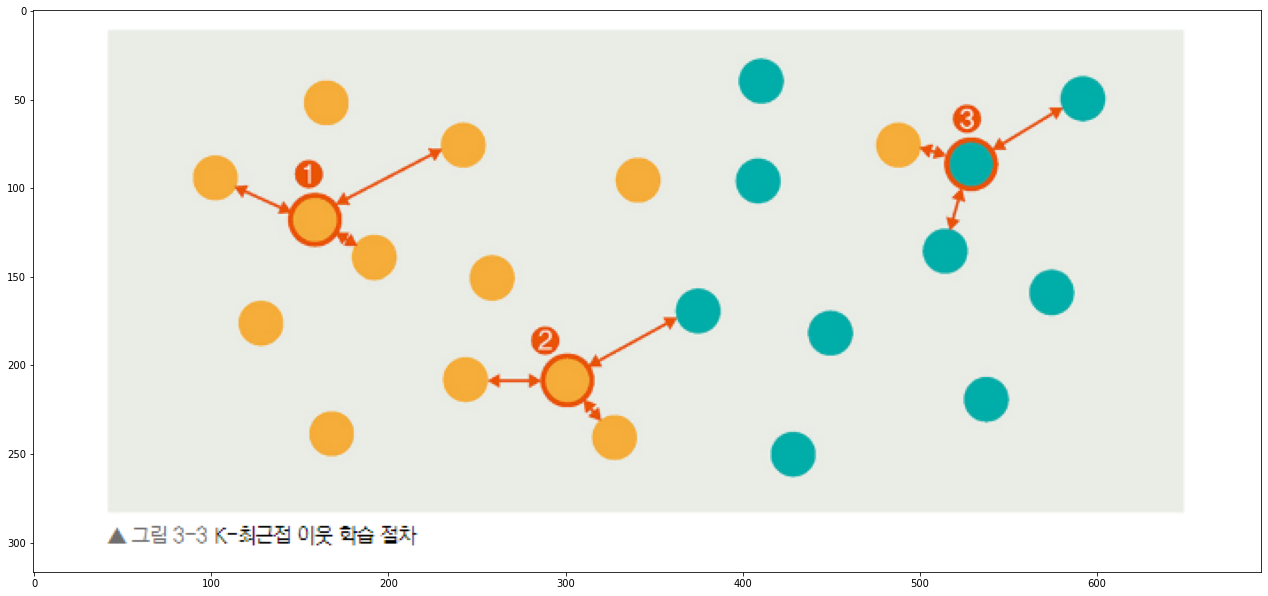

In [4]:
img2 = image.imread('./image/k2.png')
plt.rcParams["figure.figsize"] = (22, 22)
plt.imshow(img2)
plt.show()

라이브러리 호출 및 데이터셋 생성

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics # 클래스가...? 아니네?

names = ['sepal-length', 'sepal-width', 'patal-length', 'petal-width', 'Class']
dataset = pd.read_csv('./data/iris.data')
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


준비한 데이터를 전처리하고 훈련과 테스트 데이터셋으로 분리한다.

In [6]:
dataset.shape

(149, 5)

일단 X와 y를 분리한다.

In [7]:
X = dataset.iloc[:, :-1].values # 위를 참고하면 (149, 4) 형태가 되는거지. 그리고 values라고 하면 numpy가 반환된다.
print(f'X type > {type(X)} shape > {X.shape}')
y = dataset.iloc[:, -1:].values 
print(f'X type > {type(y)} shape > {y.shape}')

X type > <class 'numpy.ndarray'> shape > (149, 4)
X type > <class 'numpy.ndarray'> shape > (149, 1)


train과 test를 나눈다.

In [13]:
from sklearn.model_selection import train_test_split # 아까 본놈
# from sklearn.model_selection import StratifiedKFold # 스트라스 필드인줄
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

특성스케일링(정규화?)를 한다.

In [14]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler() # 특성 스케일링, 평균이 0, 표준편차가 1이 되도록 변환

# fit이? 필요하다고 한다.
# X_train = s.transform(X_train)
# X_test = s.transform(X_test) 

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

모델 생성 및 훈련 (이렇게 빨리?)

In [15]:
from sklearn.neighbors import KNeighborsClassifier # 아까 본 K최근접 이웃 모델 새성
knn = KNeighborsClassifier(n_neighbors=50) # K=50인 K-최근접 이웃 모델 생성
knn.fit(X_train, y_train)

/home/kokokk/anaconda3/envs/tf_test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=50)

정확도 측정

In [17]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print(f'정확도 > {accuracy_score(y_test, y_pred)}') 
# train_test_split() 가 어떻게 분할 했냐에 따라 다름

정확도 > 0.9


자 최적의 K값을 찾아보자

In [31]:
k = 10 # 초기값
acc_array = np.zeros(k) # 굳이?

for curr_k in np.arange(1, k+1, 1) : # k는 1에서 10까지 취함 1step
    curr_model = KNeighborsClassifier(n_neighbors=curr_k)
    print(f'curr_model :\n\t{curr_model}')
    curr_model.fit(X_train, y_train)
    curr_y_pred = curr_model.predict(X_test)
    curr_acc = accuracy_score(y_test, curr_y_pred)
    print(y_test.shape)
    print(curr_y_pred.shape)
    acc_array[curr_k - 1] = curr_acc

print('완료')

curr_model :
	KNeighborsClassifier(n_neighbors=1)
(30, 1)
(30, 1)
curr_model :
	KNeighborsClassifier(n_neighbors=2)
(30, 1)
(30, 1)
curr_model :
	KNeighborsClassifier(n_neighbors=3)
(30, 1)
(30, 1)
curr_model :
	KNeighborsClassifier(n_neighbors=4)
(30, 1)
(30, 1)
curr_model :
	KNeighborsClassifier()
(30, 1)
(30, 1)
curr_model :
	KNeighborsClassifier(n_neighbors=6)
(30, 1)
(30, 1)
curr_model :
	KNeighborsClassifier(n_neighbors=7)
(30, 1)
(30, 1)
curr_model :
	KNeighborsClassifier(n_neighbors=8)
(30, 1)
(30, 1)
curr_model :
	KNeighborsClassifier(n_neighbors=9)
(30, 1)
(30, 1)
curr_model :
	KNeighborsClassifier(n_neighbors=10)
(30, 1)
(30, 1)
완료


/home/kokokk/anaconda3/envs/tf_test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/kokokk/anaconda3/envs/tf_test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/kokokk/anaconda3/envs/tf_test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/kokokk/anaconda3/envs/tf_test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vect

In [ ]:
max